In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy.spatial.transform import Rotation

import sys
sys.path.insert(0, '../..')

from src.dlt import dlt
from src.data import utils

# Direct Linear Transform Demo

Using the Direct Linear Transform (DLT) to infer the world coordinates of an observer in two images of the Golden Gate Bridge.

### View 1

camera position: [-573.29538037   51.45230051  156.15724488]
camera euler angles (xyz): [15.64065352 60.83321814  8.79962477]
camera intrinsics:
[[-2.84238796e+00  3.21847720e-01 -7.50201261e-01]
 [-3.36482141e-16  2.74758519e+00  5.49056501e-01]
 [-0.00000000e+00 -0.00000000e+00  1.00000000e+00]]


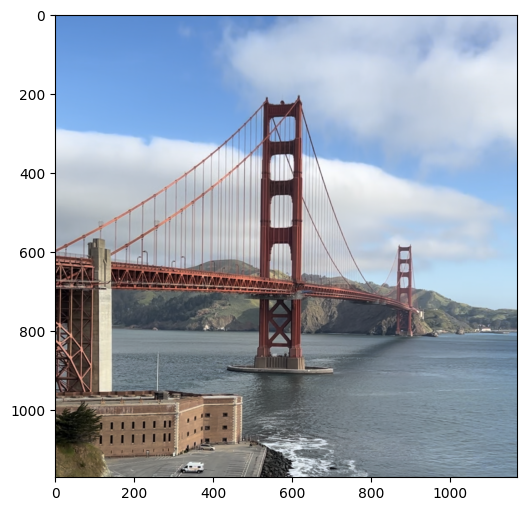

In [2]:
x_1, K1, R1 = dlt.dlt('../../data/bridge_world.json', '../../data/bridge_view1.json')
print(f'camera position: {x_1}')
print(f'camera euler angles (xyz): {Rotation.from_matrix(R1).as_euler("xyz", degrees=True)}')
print(f'camera intrinsics:\n{K1}')

image = Image.open('../../images/bridge1.png')
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.show()

### View 2

camera position: [-1052.78059949     7.04162979   690.89559145]
camera euler angles (xyz): [15.74600256 67.12128826 14.13315484]
camera intrinsics:
[[-2.44536163e+00  7.25234170e-02  2.52285196e-01]
 [-1.97058934e-16  1.60910831e+00  2.71883363e-01]
 [-0.00000000e+00 -0.00000000e+00  1.00000000e+00]]


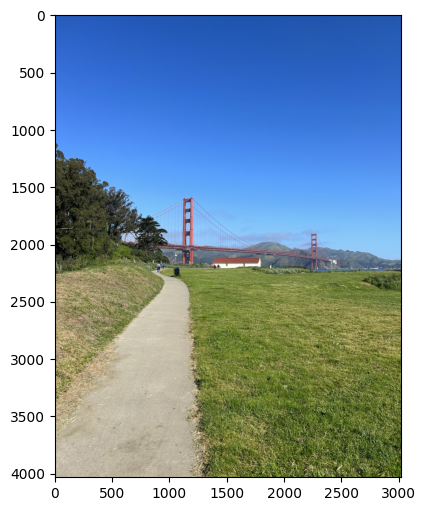

In [3]:
x_2, K2, R2 = dlt.dlt('../../data/bridge_world.json', '../../data/bridge_view2.json')
print(f'camera position: {x_2}')
print(f'camera euler angles (xyz): {Rotation.from_matrix(R2).as_euler("xyz", degrees=True)}')
print(f'camera intrinsics:\n{K2}')

image = Image.open('../../images/bridge2.png')
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.show()

### Bird's Eye View

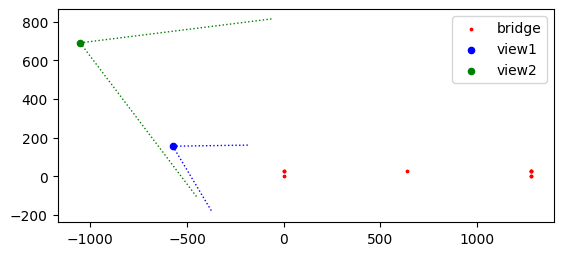

In [4]:
def plot_line(start, angle, length, color):
    endx = start[0] + length * np.cos(angle * np.pi / 180)
    endy = start[1] + length * np.sin(angle * np.pi / 180)
    plt.plot([start[0], endx], [start[1], endy], lw=1, c=color, ls=':')

world_positions, view_positions, _, _ = utils.read_points('../../data/bridge_world.json', '../../data/bridge_view2.json')
plt.scatter(world_positions[:,0], world_positions[:,2], c='r', s=3, label='bridge')
plt.scatter(x_1[0], x_1[2], c='b', s=20, label='view1')
angle1 = Rotation.from_matrix(R1).as_euler("xyz", degrees=True)[1] - 90
plot_line([x_1[0], x_1[2]], angle1 + 30, 400, 'b')
plot_line([x_1[0], x_1[2]], angle1 - 30, 400, 'b')
plt.scatter(x_2[0], x_2[2], c='g', s=20, label='view2')
angle2 = Rotation.from_matrix(R2).as_euler("xyz", degrees=True)[1] - 90
plot_line([x_2[0], x_2[2]], angle2 + 30, 1000, 'g')
plot_line([x_2[0], x_2[2]], angle2 - 30, 1000, 'g')
plt.gca().set_aspect('equal')
plt.legend()
plt.show()